In [1]:
import site
site.addsitedir("./illustris_python/") 

import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py

from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
font = {'family' : 'serif',
        'size'   : 20}
mpl.rc('font', **font)

### Group Catalogs

In [2]:
basePath = '../Illustris-3'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath,135, fields=fields)
halos = il.groupcat.loadHalos(basePath, 135, fields=None)
#header = il.groupcat.loadHeader(basePath,135,fileName=fileName)

../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.1.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.1.hdf5


In [3]:
subhalos.keys()
print(subhalos.keys())
subhalos['SubhaloMass'].shape

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad'])


(121209,)

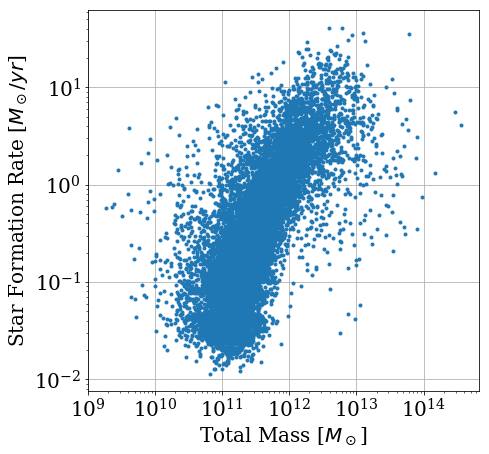

In [4]:
fig = plt.figure(figsize=(7, 7))
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.704
plt.plot(mass_msun,subhalos['SubhaloSFRinRad'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Mass [$M_\odot$]', size=20)
plt.ylabel('Star Formation Rate [$M_\odot / yr$]', size=20)
plt.grid()
plt.savefig('groupcatalog', bbox_inches = 'tight')
plt.show()

In [5]:
print(halos.keys())
halos['GroupMass'].shape

dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


(131727,)

In [7]:
GroupFirstSub = il.groupcat.loadHalos(basePath,135,fields=['GroupFirstSub'])
GroupFirstSub.dtype
GroupFirstSub.shape

../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.1.hdf5


(131727,)

In [8]:
ptNumGas = il.snapshot.partTypeNum('gas') # 0
ptNumStars = il.snapshot.partTypeNum('stars') # 4
for i in range(5):
    all_fields = il.groupcat.loadSingle(basePath,135,subhaloID=GroupFirstSub[i])
    gas_mass   = all_fields['SubhaloMassInHalfRadType'][ptNumGas]
    stars_mass = all_fields['SubhaloMassInHalfRadType'][ptNumStars]
    frac = gas_mass / (gas_mass + stars_mass)
    print(GroupFirstSub[i], frac)

../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
0 0.0688846
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
608 0.0236937
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
1030 0.0638515
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
1396 0.00357705
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
../Illustris-3/groups_135/groups_135.0.hdf5
1801 0.1222


In [13]:
basePath = '../Illustris-3'
fields = ['SubhaloMass','SubhaloSFRinRad']
subhalos = il.groupcat.loadSubhalos(basePath, 0, fields=fields)

halos = il.groupcat.loadHalos(basePath, 0, fields=None)
#header = il.groupcat.loadHeader(basePath,135,fileName=fileName)

../Illustris-3/groups_000/groups_000.0.hdf5
../Illustris-3/groups_000/groups_000.0.hdf5
